##### Data source
Individual Income Tax Statistics: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi \
Data for New York, 2018.

In [3]:
import pandas as pd

### IRS Income Data
Data from the year 2018, which is the latest IRS data available online. 

In [4]:
df_income = pd.read_csv("ny_income.csv")

In [15]:
df_income

,zip_code,size_of_adjusted_gross_income,number_of_returns
0,0.0,1.0,"3,161,770"
1,0.0,2.0,"2,223,030"
2,0.0,3.0,"1,365,250"
3,0.0,4.0,"871,610"
4,0.0,5.0,"1,376,380"
...,...,...,...
12281,99999.0,2.0,"19,070"
12282,99999.0,3.0,"11,950"
12283,99999.0,4.0,"7,930"
12284,99999.0,5.0,"12,370"


In [8]:
#deleteing rows with NaN
df_income.dropna(inplace = True)
df_income

,zip_code,size_of_adjusted_gross_income,number_of_returns
0,0.0,1.0,"3,161,770"
1,0.0,2.0,"2,223,030"
2,0.0,3.0,"1,365,250"
3,0.0,4.0,"871,610"
4,0.0,5.0,"1,376,380"
...,...,...,...
12281,99999.0,2.0,"19,070"
12282,99999.0,3.0,"11,950"
12283,99999.0,4.0,"7,930"
12284,99999.0,5.0,"12,370"


In [16]:
#changing zip_code type from float to integer
df_income["zip_code"] = df_income["zip_code"].astype(int)
df_income["size_of_adjusted_gross_income"] = df_income["size_of_adjusted_gross_income"].astype(int)
df_income.head(10)

,zip_code,size_of_adjusted_gross_income,number_of_returns
0,0,1,"3,161,770"
1,0,2,"2,223,030"
2,0,3,"1,365,250"
3,0,4,"871,610"
4,0,5,"1,376,380"
5,0,6,"634,070"
8,10001,1,"3,680"
9,10001,2,"2,470"
10,10001,3,"2,070"
11,10001,4,"1,560"


In [ ]:
#replacing 0 with 00000
df_income["zip_code"].replace({0: "00000"}, inplace=True)
df_income

In [ ]:
#filtering data for income 100,000 or more
#keeping income categories 5 (100k - bellow 200K) an 6 (200k or more)
df_high_income = df_income.loc[(df_income['size_of_adjusted_gross_income'] == 5) | \
           (df_income['size_of_adjusted_gross_income'] == 6)]
df_high_income

### Top 25 sations with zipcodes

In [6]:
df_postal_codes = pd.read_csv("top_25_w_zipcodes.csv")
df_postal_codes

,STATION_LINE,Daily_Entries_x,STATION,LINENAME,zipcode
0,34 ST-PENN STA ACE,387800,34 ST-PENN STA,ACE,10001
1,FULTON ST 2345ACJZ,376692,FULTON ST,2345ACJZ,10038
2,14 ST FLM123,338837,14 ST,FLM123,10019
3,33 ST 6,315134,33 ST,6,10037
4,49 ST NQRW,293311,49 ST,NQRW,10019
5,CORTLANDT ST RNW,287559,CORTLANDT ST,RNW,10007
6,KINGSBRIDGE RD BD,275429,KINGSBRIDGE RD,BD,10468
7,VERNON-JACKSON 7,272837,VERNON-JACKSON,7,11101
8,WALL ST 23,269157,WALL ST,23,10038
9,46 ST MR,263085,46 ST,MR,11103


In [19]:
#filtering high_income_df by only keeping zipcodes of top 25 stations
zip_code_mask = df_high_income['zip_code'].isin(df_postal_codes['zipcode'])
df_high_income = df_high_income[zip_code_mask]
#df_high_income.to_pickle('df_high_income.pkl')
df_high_income

,zip_code,size_of_adjusted_gross_income,number_of_returns
12,10001,5,"3,200"
13,10001,6,"3,170"
60,10007,5,630
61,10007,6,"1,790"
76,10010,5,"4,120"
77,10010,6,"4,460"
108,10014,5,"4,790"
109,10014,6,"5,480"
140,10019,5,"6,050"
141,10019,6,"6,070"


In [21]:
#grouped high income  by zipcode 
df_high_income['number_of_returns'] = df_high_income['number_of_returns'].str.replace(',','').astype(int)
df_grouped_high_income = df_high_income.groupby(['zip_code'])['number_of_returns'].sum().sort_values(ascending = False)
df_grouped_high_income

zip_code
10024    15740
10019    12120
10014    10270
10010     8580
11101     7330
10001     6370
10038     4780
10027     4490
11216     4170
11204     3750
11221     3410
10026     3380
11103     3140
10007     2420
10040     2220
10034     2140
11419     1440
10037     1280
10468     1230
10452      780
10453      750
Name: number_of_returns, dtype: int64

In [16]:
df_grouped_high_income = df_grouped_high_income.reset_index()

In [22]:
#merging tables with top 25 stations with data with high income using the zipcode column
top_25_with_income = pd.merge(left = df_postal_codes, right = df_grouped_high_income, how = 'inner', left_on= 'zipcode', right_on = 'zip_code')

In [23]:
top_25_with_income.sort_values('number_of_returns',inplace=True)
top_25_with_income

,STATION_LINE,Daily_Entries_x,STATION,LINENAME,zipcode,number_of_returns
20,174-175 STS BD,221548,174-175 STS,BD,10453,750
16,170 ST BD,230816,170 ST,BD,10452,780
9,KINGSBRIDGE RD BD,275429,KINGSBRIDGE RD,BD,10468,1230
6,33 ST 6,315134,33 ST,6,10037,1280
7,51 ST 6,254657,51 ST,6,10037,1280
23,ROCKAWAY BLVD A,219905,ROCKAWAY BLVD,A,11419,1440
17,66 ST-LINCOLN 1,229390,66 ST-LINCOLN,1,10034,2140
15,181 ST A,233546,181 ST,A,10040,2220
8,CORTLANDT ST RNW,287559,CORTLANDT ST,RNW,10007,2420
11,46 ST MR,263085,46 ST,MR,11103,3140


In [23]:
import matplotlib

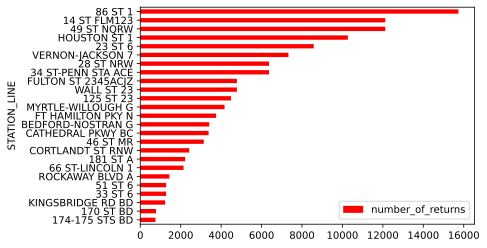

In [30]:
#Charitable Donations Bar Plot
Top_25_income_plot = top_25_with_income.plot.barh(x = 'STATION_LINE', y='number_of_returns', rot=0, color = 'red')

In [34]:
plt.savefig('/Users/lauraurdapilleta/OneDrive/Metis/Jupyter Notebooks/Project1')

<Figure size 432x288 with 0 Axes>